# Exercise 4 : Linear Regression

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## Problem 1 : Predicting SalePrice using GrLivArea

Plot `SalePrice` against `GrLivArea` using standard ScatterPlot/JointPlot.

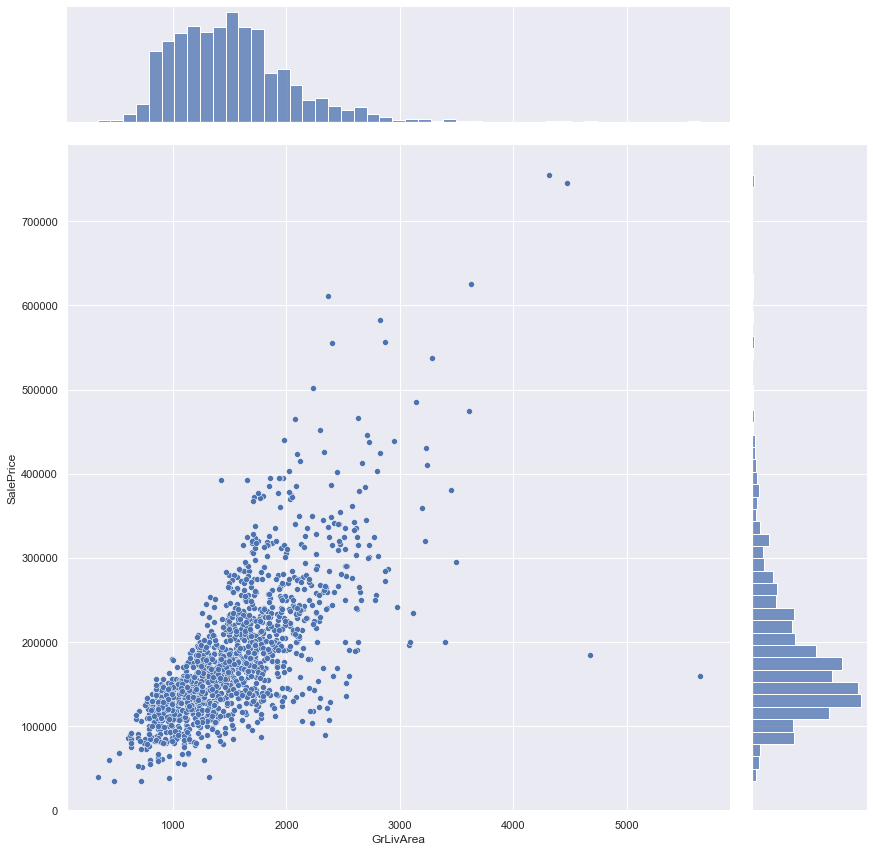

In [3]:
sb.jointplot(data = houseData, x = "GrLivArea", y = "SalePrice", height = 12)

Check the Correlation Coefficient to get a confirmation on the strong linear relationship you observe.

In [4]:
houseData.SalePrice.corr(houseData.GrLivArea)

0.7086244776126522

I know; you need not do the above in this exercise. However, it is a good practice to check linear relationship before proceeding with linear regression.

Import the `LinearRegression` model from `sklearn.linear_model`.

In [5]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

Split the dataset in Train and Test sets, uniformly at random.   
Train Set with 80% of data and Test Set with 20% of data.     

In [6]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData['GrLivArea'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


Quick tip : We check the dimension with `shape` as above to note if the train and test set are 2D arrays, where the shape will show up as (n, 1), or if they are 1D arrays, where the shape will show up as (n,). If you see the 1D case for your train and test data, `LinearRegression` model will throw you an error. Make sure you convert your train and test to `DataFrame`, as I did above, so that they are 2D. Pandas and Scikit technicalities; can't help!

Fit Linear Regression model on the Training Dataset.

In [7]:
linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Check the coefficients of the Linear Regression model you just fit.

In [8]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [15128.06331914]
Coefficients 	: a =  [[109.60458376]]


Plot the regression line based on the coefficients-intercept form.

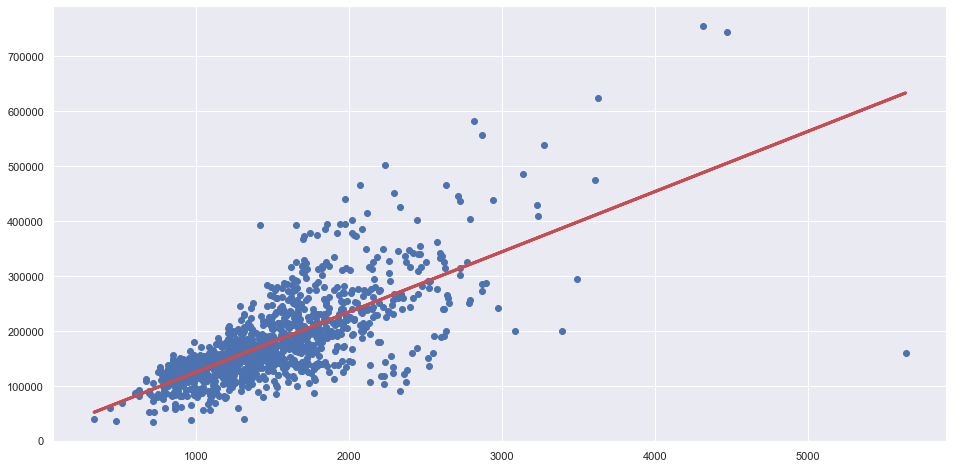

In [9]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.

In [10]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.5169097734268566


Metric : Mean Squared Error (MSE) on the Train Set.

In [11]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 3028734460.9819093


**Do you think this MSE is too large to be accurate?**       

Think again. Note that the values of $y$ or `SalePrice` are in the order of 100,000 (10^5). Thus, the values of $(y - \hat{y})$ will also be in the order of 10,000 (10^4) to 100,000 (10^5). But you *square* those values for Mean Squared Error, and thus MSE should be expected to be of the order (10^4)^2 = 10^8 to (10^5)^2 = 10^10. Now the figure above should not scare you so much. ;-)     

Good fit in linear regression does not mean that MSE needs to be *small* in absolute value. It just means that MSE should be small enough compared to the original variance in $y$. That is, what matters most is the ratio $\frac{\text{MSE}}{\text{VAR}(y)}$, as in $R^2 = 1 - \frac{\text{MSE}}{\text{VAR}(y)}$, and not just the value of MSE. Be careful with this.

#### Prediction of Response based on the Predictor

Predict `SalePrice` given `GrLivArea` in the Test dataset.

In [12]:
# Predict SalePrice values corresponding to GrLivArea
y_test_pred = linreg.predict(X_test)

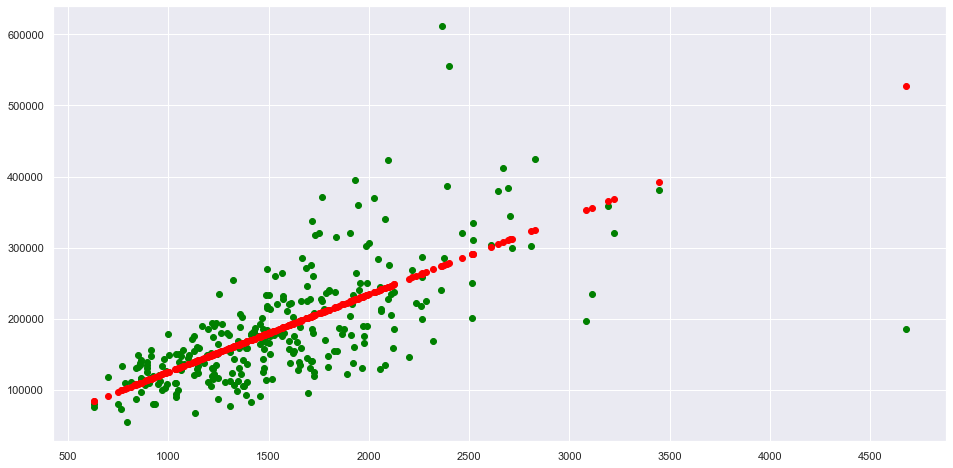

In [13]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Prediction Accuracy of the Linear Regression Model

Check how good the predictions are on the Test Set.    
Metric : Mean Squared Error (MSE) on the Train Set.

In [14]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 3593200730.0239005


Once again, don't freak out with this huge MSE. Compare it with the MSE in the Train set above to see if you are doing alright. If the model is simple and generalized, the MSE for Train and Test should be similar (can't tell which one will be smaller). However, if you are *overfitting* your Train set, then the MSE of the Train set will be much better (smaller) compared to that of the Test set. This is a good indicator that you need to fix your model. More on this later.

---

## Problem 2 : Predicting SalePrice using Other Variables

I will start by writing a generic function to do everything we did earlier on any given $y$ and $X$ in a dataset. Nothing special; this is pure Python.

In [15]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    '''
        Function to perform Linear Regression with Xvar and yvar in df.
        Prints the required plots within the function. Returns nothing.
    '''    
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

#### Linear Regression on SalePrice vs TotalBsmtSF

Intercept 	: b =  [65426.50694986]
Coefficients 	: a =  [[109.38185324]]


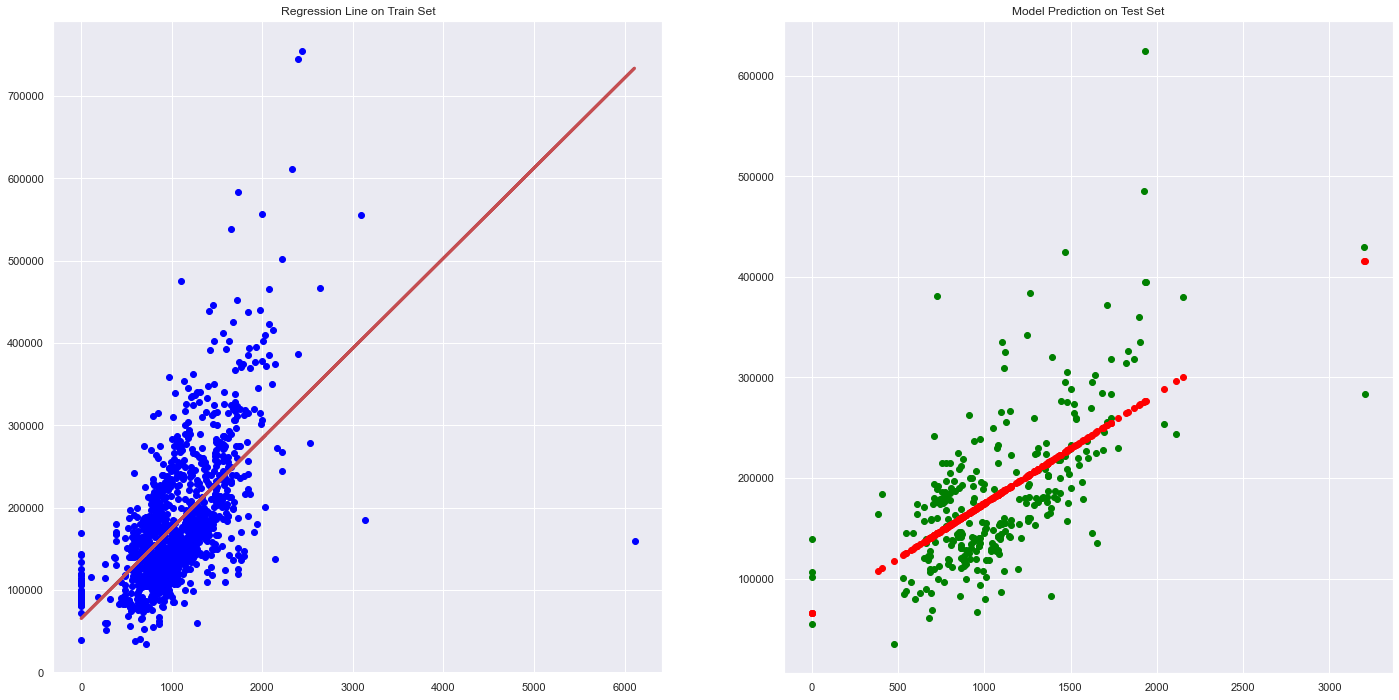

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3666470811509043
Mean Squared Error (MSE) 	: 4083101494.510773

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 3332616934.46609



In [17]:
univariateLinearRegression(Xvar = "TotalBsmtSF", yvar = "SalePrice", df = houseData)

#### Linear Regression on SalePrice vs GarageArea

Intercept 	: b =  [73955.535374]
Coefficients 	: a =  [[224.50313787]]


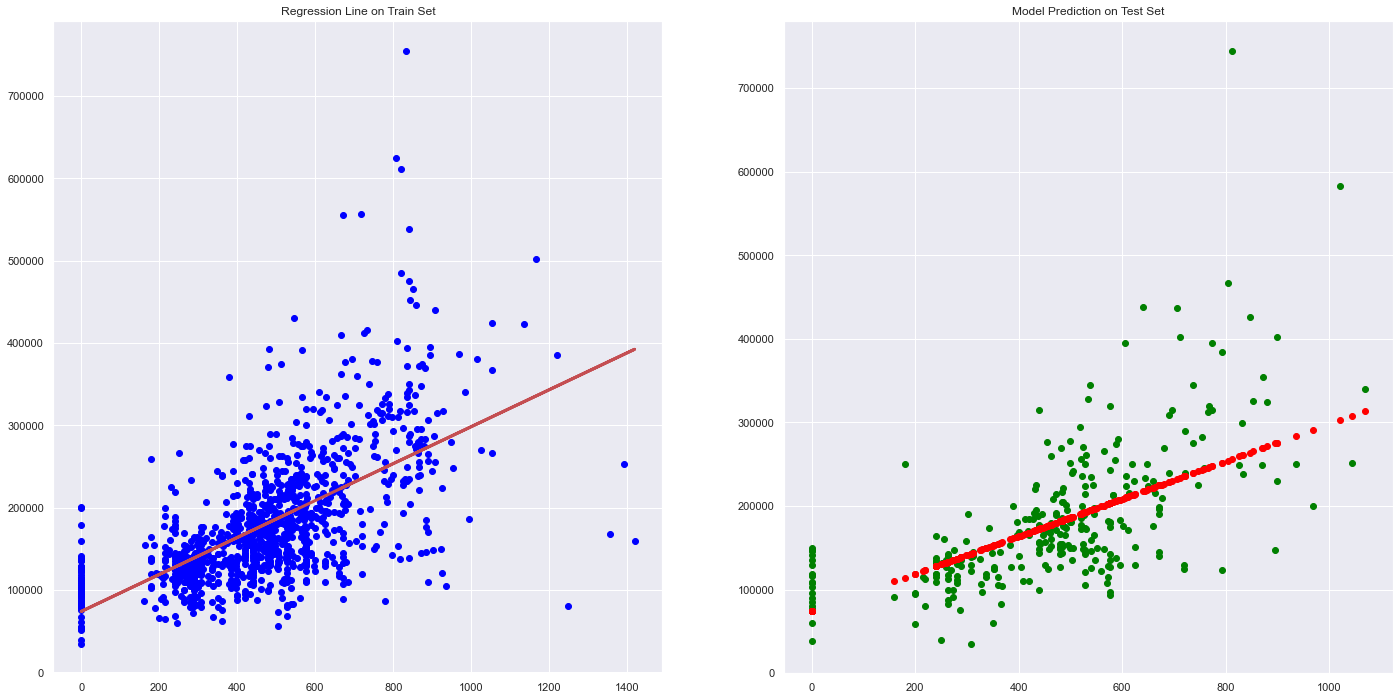

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3822774109101841
Mean Squared Error (MSE) 	: 3748023558.3123794

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 4300348480.41798



In [18]:
univariateLinearRegression(Xvar = "GarageArea", yvar = "SalePrice", df = houseData)

Don't worry about the regression line in the above plots -- the slope is NOT different for the train and test. It's just that the scale of x-axis and y-axis are different for train and test (mostly due to the outliers in the two data distributions), and thus, the line "looks" a little different. They are correct.

### Comparing the Uni-Variate Linear Models

Compare and contrast the models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `SalePrice` vs `GrLivArea` has the best Explained Variance (R^2) out of the four models ~ 0.5.   
* `SalePrice` vs `TotalBsmtSF` and `SalePrice` vs `GarageArea` have similar but lower R^2.    
* Naturally, the model with `GrLivArea` is the best one in terms of the goodness of fit on Train Set.    


* `SalePrice` vs `GrLivArea` has the minimum MSE on both the Train and Test Sets compared to other models.   
* `SalePrice` vs `TotalBsmtSF` and `SalePrice` vs `GarageArea` have similar but higher MSE in both sets.    
* Naturally, the model with `GrLivArea` is the best one (lowest MSE) in terms of Test accuracy on the Test Set.    

So, overall, the predictor `GrLivArea` is the best amongst these variables in predicting `SalePrice`.      

**Did you notice?** : Go back and check again the R^2 and MSE values for the models. I am pretty sure you did not get the exact same values as I did. This is due to the random selection of Train-Test sets. In fact, if you run the above cells again, you will get a different set of R^2 and MSE values. If that is so, can we *really* be confident that `GrLivArea` will always be the best variable to predict `SalePrice`? Think about it. ;-)

---
## Problem 3 : Refining the Models to Predict SalePrice

#### Remove outliers for GrLivArea and SalePrice

Check the outliers in these two variables first. Note that the outliers may indicate the same houses in the data.

In [19]:
# Extract the two variables for simplicity
targetData = houseData[['GrLivArea', 'SalePrice']].copy()
# Make a clean "copy" and not just a slice of the dataset

GrLivArea    31
SalePrice    61
dtype: int64

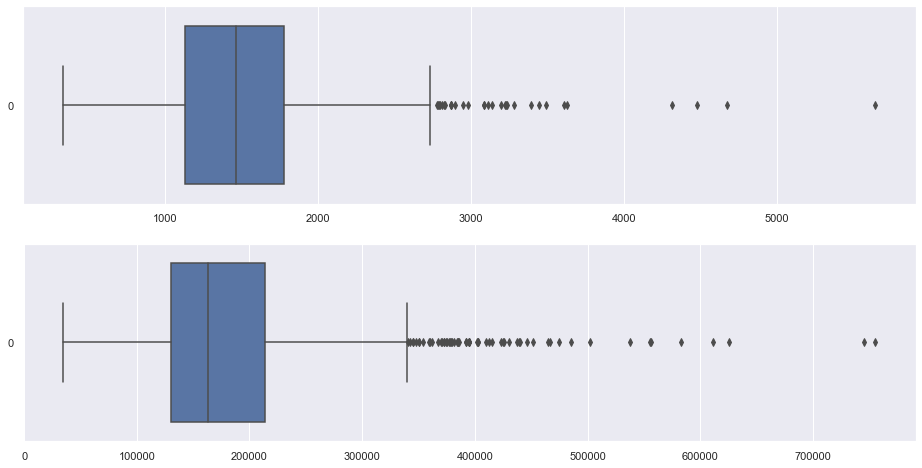

In [20]:
# Draw the boxplots
f, axes = plt.subplots(2, 1, figsize=(16, 8))

sb.boxplot(data = targetData["GrLivArea"], orient = "h", ax = axes[0])
sb.boxplot(data = targetData["SalePrice"], orient = "h", ax = axes[1])

# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

Let's find out the row-indices for the outlierrs using the same "rule" as we defined above. It's important to note that `rule` is just a 2-variable dataframe in this case, as depicted below. Thus, indices that we want from `rule` is when *any* column of it is `True`, that is, when any of the two variables has outlier.

In [21]:
# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,GrLivArea,SalePrice
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1455,False,False
1456,False,False
1457,False,False
1458,False,False


In [22]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [23]:
# How many points are outliers for the two variables combined?
outliers.value_counts()

False    1383
True       77
dtype: int64

In [24]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([  11,   53,   58,  112,  118,  151,  161,  178,  185,  197,  224,
             231,  278,  304,  309,  313,  320,  321,  324,  336,  349,  378,
             389,  440,  473,  477,  481,  496,  515,  523,  527,  583,  585,
             591,  608,  635,  642,  644,  654,  661,  664,  678,  688,  691,
             702,  718,  769,  774,  798,  803,  825,  877,  898,  961,  987,
             990, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1181, 1182, 1228,
            1243, 1267, 1268, 1298, 1312, 1328, 1353, 1373, 1386, 1388, 1437],
           dtype='int64')

In [25]:
# Remove the outliers based on the row indices obtained above
targetData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
targetData

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


#### Check : Did outlier removal improve our model?

Let's fit a linear regression model at this stage to check if removing outliers helped us at all.

Intercept 	: b =  [31432.56599514]
Coefficients 	: a =  [[94.58112923]]


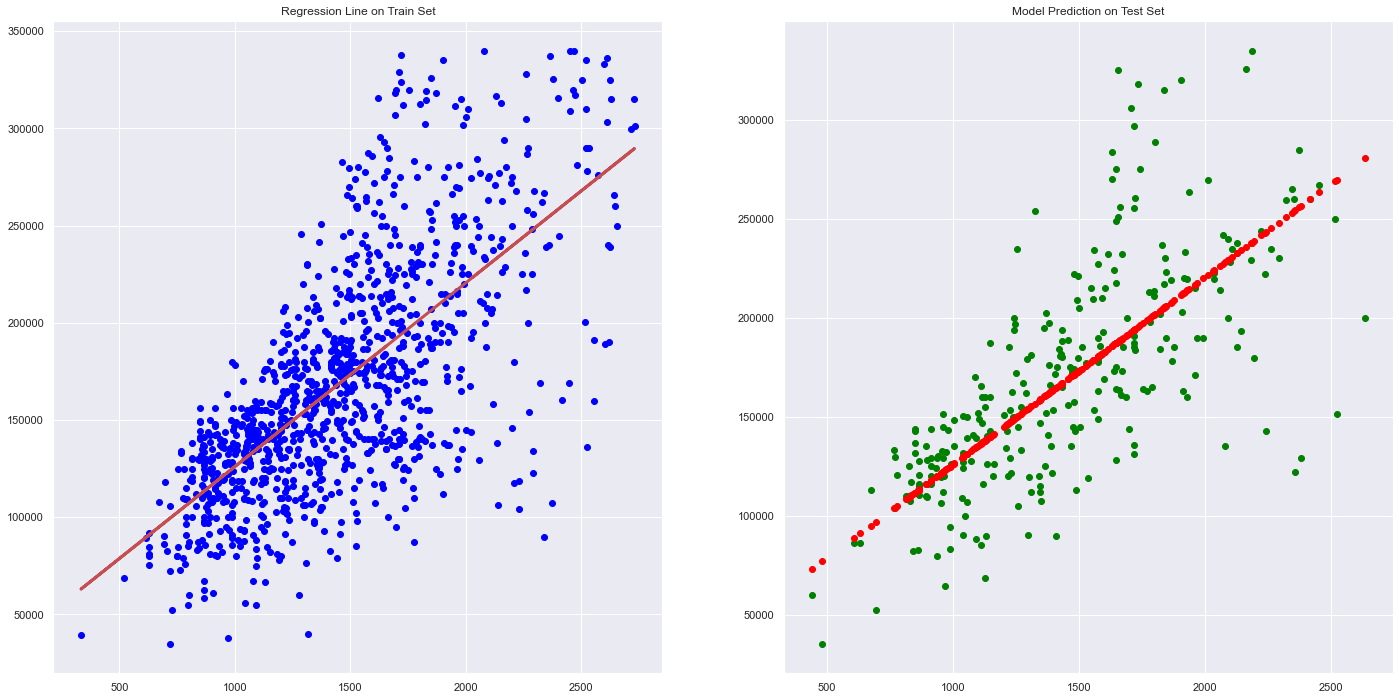

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4737080907012795
Mean Squared Error (MSE) 	: 1861339795.3393688

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1554584719.1583116



In [26]:
univariateLinearRegression(Xvar = "GrLivArea", yvar = "SalePrice", df = targetData)

Quickly compare with the original linear regression model for the two variables.

Intercept 	: b =  [24266.88309577]
Coefficients 	: a =  [[102.60775226]]


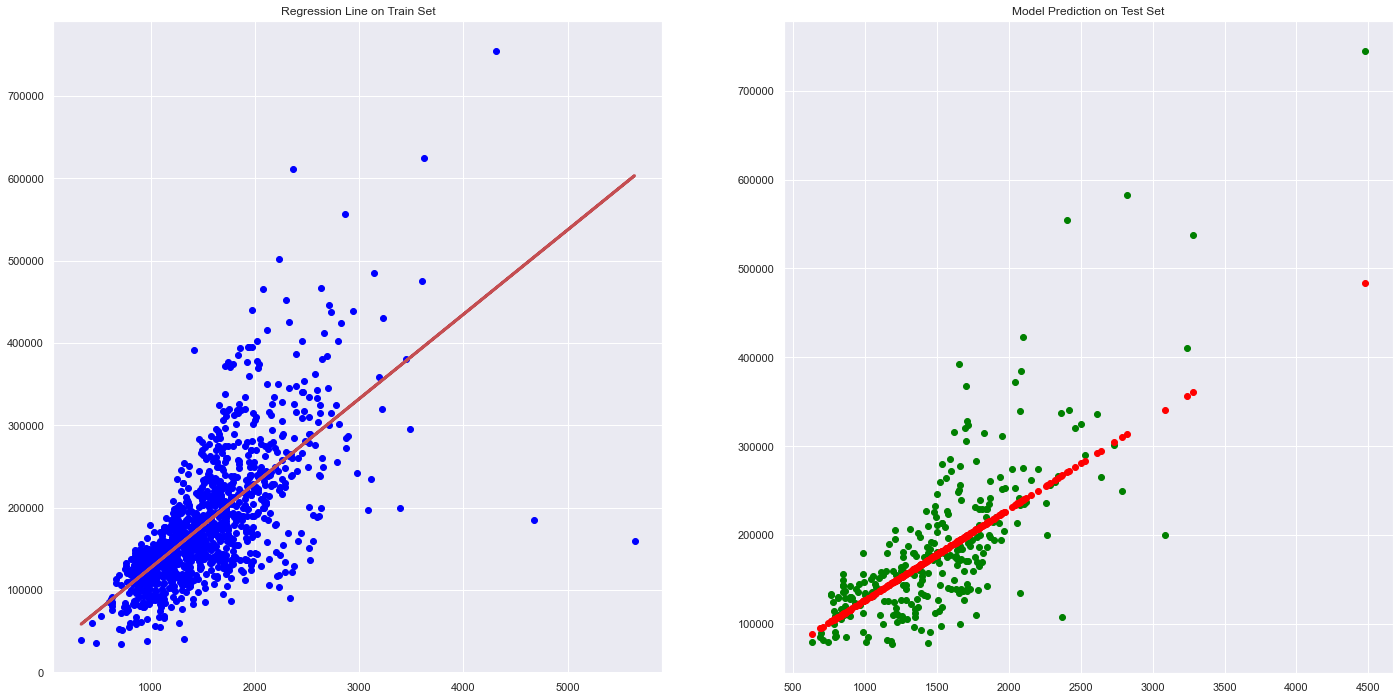

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.48475730161378106
Mean Squared Error (MSE) 	: 3151188014.94257

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 3129365937.730946



In [27]:
univariateLinearRegression(Xvar = "GrLivArea", yvar = "SalePrice", df = houseData)

**Observation:** Quite interesting, isn't it? It seems that MSE improved a lot for the cleaned (outlier removed) data, but the R^2 has not changed a lot. That means we are reducing both MSE and VAR($y$) in the dataset (and consequently in the train set) as we remove the outliers. So, MSE improves a lot, but R^2 remains similar. This is actually an improvement, as our final prediction accuracy and confidence intervals depend on the MSE of our model on test set.

#### Something Extra : Transform the Response Variable to reduce Skew

Let us check the skew of the variables, and try to transform the response variable to make it more symmetric.      
This may help in certain cases, but you are not supposed to do this for this exercise. This is something extra.   

In [28]:
# We start with the clean outlier-removed dataset
targetData.skew()

GrLivArea    0.460455
SalePrice    0.692276
dtype: float64

In [29]:
# What was the skew in the original data we had?
houseData[["GrLivArea","SalePrice"]].skew()

GrLivArea    1.366560
SalePrice    1.882876
dtype: float64

Wow! It seems that removing outliers has already helped us a lot with the skewness in the data.     
- Skewness between -0.5 to 0.5 is considered more or less *symmetric* (no need to transform)
- Skewness between -1.0 to -0.5 or 0.5 to 1.0 is *moderately skewed* (we may try a transform)
- Skewness below -1.0 or above 1.0 is *highly skewed* (we should try transforming the response)

In this case, we may try fixing the *moderate skewness* of `SalePrice` in the cleaned dataset.     
No need to transform `GrLivArea` as it has *low skewness* and it is not the response variable.

In [30]:
# Make a new column for the transformed response variable
# Go ahead and try out a couple of different transforms
targetData['logSalePrice'] = np.log(targetData['SalePrice'])
targetData['sqrtSalePrice'] = np.sqrt(targetData['SalePrice'])

In [31]:
# Check the skewness of the transformed variables
targetData.skew()

GrLivArea        0.460455
SalePrice        0.692276
logSalePrice    -0.332811
sqrtSalePrice    0.238556
dtype: float64

Ok, both the transformations reduced skewness to the acceptable margin (-0.5 to 0.5).     
I will use `sqrtSalePrice` for the fit. You may of course try out both the transforms.

#### Check : Did the transformation improve our model?

Let's fit a linear regression model at this stage to check if the transformation helped us at all.

Intercept 	: b =  [240.95077333]
Coefficients 	: a =  [[0.11323192]]


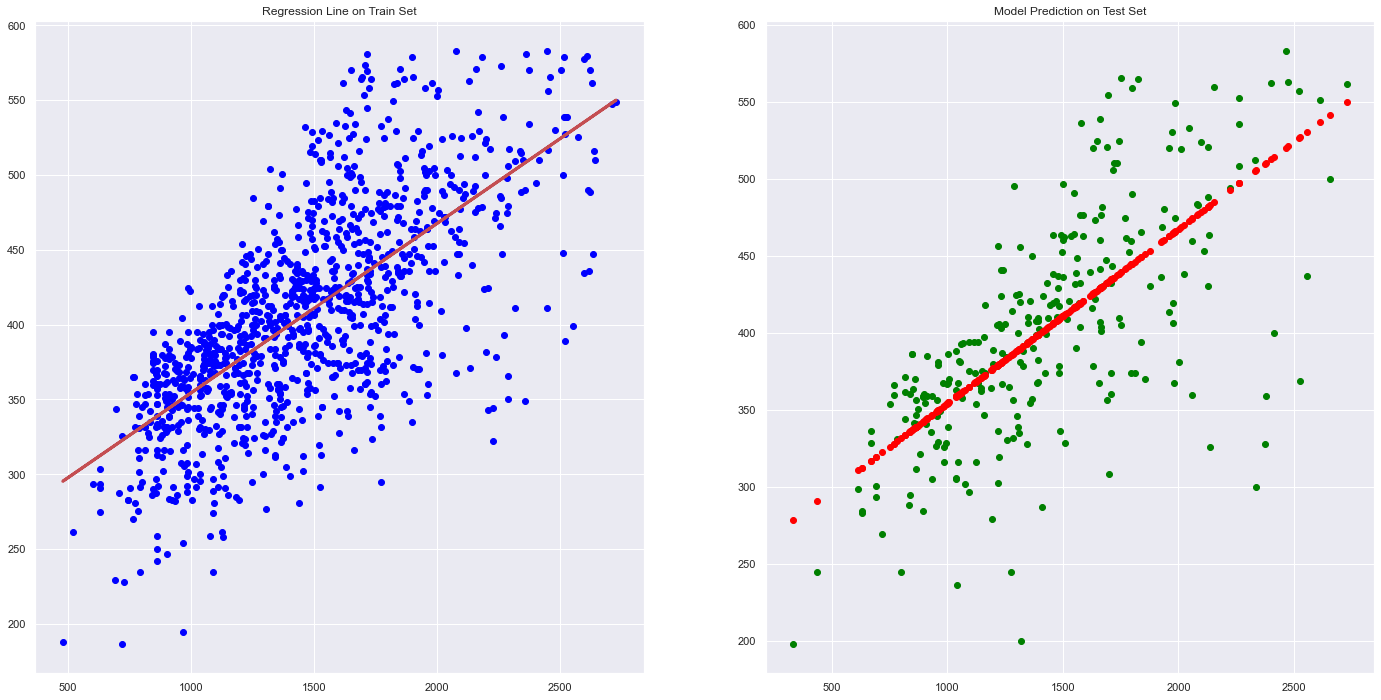

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4804962879554706
Mean Squared Error (MSE) 	: 2528.4540273710695

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 2828.7491116948154



In [32]:
univariateLinearRegression(Xvar = "GrLivArea", yvar = "sqrtSalePrice", df = targetData)

**Observation:** That's interesting! R^2 seems to be same once again, while the MSE seems to have improved (reduced) a lot. As we mentioned earlier, reducing MSE is a good thing for prediction accuracy, right? However, note that as `SalePrice` has been transformed by `sqrt`, the *meaning* and *interpretation* of MSE has changed in this case. The MSE that you see after the transform is roughly the square-root of MSE from the original model, and thus, we should compare it in its proper scale. One way of doing that is to compare the MSE from the original model to the square-of-MSE in this model.    

- Test MSE in case of original data : Around $3 \times 10^{10}$ to $4 \times 10^{10}$
- Test MSE after the outlier-removal : Around $1 \times 10^{10}$ to $2 \times 10^{10}$
- Test MSE after the response-transform : Around $2 \times 10^4$ to $3 \times 10^4$

Thus, the transform did help the MSE to some extent (after squaring, it is still smaller in order compared to the MSE of the original model), similar to what we saw for outlier-removal. However, R^2 did not change too much, indicating that VAR($y$) must have reduced on a similar scale. That is fine for us.

Improving R^2 or MSE is not the only goal for transforms. It also helps with https://en.wikipedia.org/wiki/Heteroscedasticity. Check it out if you want.

---

## Extra : Predicting SalePrice using Multiple Variables

Extract the required variables from the dataset, and then perform Multi-Variate Regression.     

In [33]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData[['GrLivArea','TotalBsmtSF','GarageArea']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (1168, 3) (1168, 1)
Test Set  : (292, 3) (292, 1)


LinearRegression()

#### Coefficients of the Linear Regression Model

Note that you CANNOT visualize the model as a line on a 2D plot, as it is a multi-dimensional surface.

In [34]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-17874.23156837]
Coefficients 	: a =  [[ 66.59481494  47.26930886 102.90061723]]


#### Prediction of Response based on the Predictor

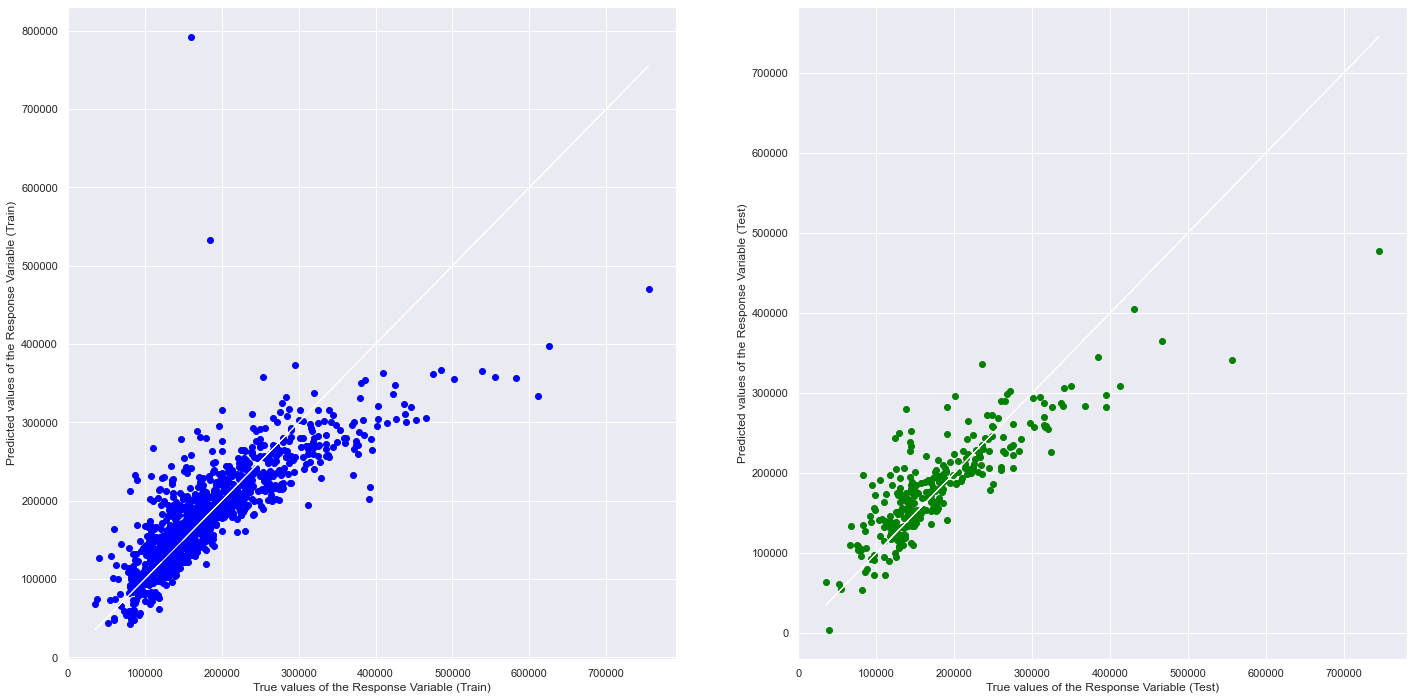

In [35]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [36]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6454394258012938
Mean Squared Error (MSE) on Train Set 	: 2192577166.577379
Mean Squared Error (MSE) on Test Set 	: 1901835384.092638


**Observation** : The model with `SalePrice` against all the variables `GrLivArea`, `TotalBsmtSF`, `GarageArea` is definitely better!     

However, does it mean that adding more variables into the model will always produce a better model? In which case would adding more variables make a model worse, and how would you spot that from the metrics we use on the train set and test set as above? Try out a few examples, and think about it.